# Importar dependências instaladas no ambiente virtual

In [2]:
%pip install scikit-learn
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install matplotlib
%pip install scipy

  Using cached scikit_learn-1.4.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached joblib-1.4.0-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.4.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.4.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
Using cached joblib-1.4.0-py3-none-any.whl (301 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached threadpoolctl-3.4.0-py3-none-any.whl (17 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached pandas-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from src.dataframes import data_AVC, df
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

# Carregar dataset

In [4]:
# Convert categorical variables to one-hot encoding
data_AVC = pd.get_dummies(data_AVC, columns=[
                      'gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status'])

# Display basic information about the dataset
print(data_AVC.info())

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, 162 to 188
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              249 non-null    int64  
 1   age                             249 non-null    int64  
 2   hypertension                    249 non-null    int64  
 3   heart_disease                   249 non-null    int64  
 4   avg_glucose_level               249 non-null    float64
 5   bmi                             209 non-null    float64
 6   stroke                          249 non-null    int64  
 7   gender_Female                   249 non-null    bool   
 8   gender_Male                     249 non-null    bool   
 9   ever_married_No                 249 non-null    bool   
 10  ever_married_Yes                249 non-null    bool   
 11  work_type_Govt_job              249 non-null    bool   
 12  work_type_Private               249 non

# Cálculo de assimetria e curtose

In [3]:
# Calculate skewness and kurtosis for numerical variables
numerical_vars = ['age', 'avg_glucose_level', 'bmi']
skewness = data_AVC[numerical_vars].apply(skew)
kurtosis_value = data_AVC[numerical_vars].apply(kurtosis)

print("\nSkewness:")
print(skewness)
print("\nKurtosis:")
print(kurtosis_value)


Skewness:
age                 -1.35
avg_glucose_level    0.55
bmi                   NaN
dtype: float64

Kurtosis:
age                  3.06
avg_glucose_level   -1.22
bmi                   NaN
dtype: float64


# Análise de variáveis que mais se relacionam com a variável principal: infarto

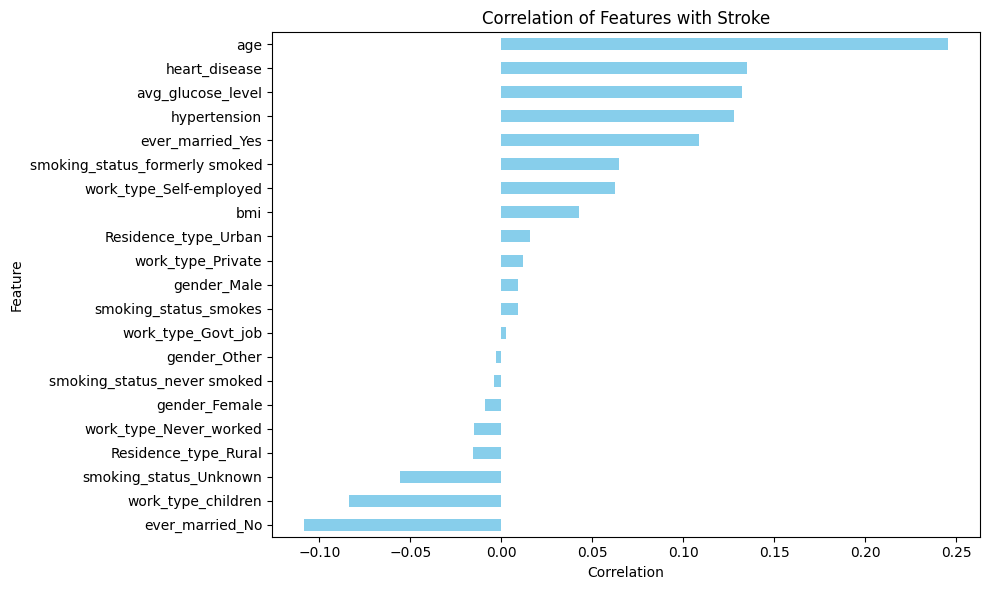

In [4]:
# Load the dataset
data = pd.read_csv('./src/data.csv')
data = data.drop(columns=['id'])
# Convert categorical variables to one-hot encoding
data = pd.get_dummies(data, columns=[
                      'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# # Display basic information about the dataset
# print(data.info())

# # Calculate skewness and kurtosis for numerical variables
# numerical_vars = ['age', 'avg_glucose_level', 'bmi']
# skewness = data[numerical_vars].apply(skew)
# kurtosis_value = data[numerical_vars].apply(kurtosis)

# print("\nSkewness:")
# print(skewness)
# print("\nKurtosis:")
# print(kurtosis_value)

# Compute the correlation matrix
correlation_matrix = data.corr()

stroke_correlation = data.corr()['stroke'].drop(
    'stroke')  # Drop correlation of 'stroke' with itself

# Plot the correlations
plt.figure(figsize=(10, 6))
stroke_correlation.sort_values().plot(kind='barh', color='skyblue')
plt.title('Correlation of Features with Stroke')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.tight_layout()  # Adjust layout
plt.show()

## Correlacao com pessoas de ate 35 anos


<class 'pandas.core.frame.DataFrame'>
Index: 1899 entries, 162 to 5107
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             1899 non-null   float64
 1   hypertension                    1899 non-null   int64  
 2   heart_disease                   1899 non-null   int64  
 3   avg_glucose_level               1899 non-null   float64
 4   bmi                             1849 non-null   float64
 5   stroke                          1899 non-null   int64  
 6   gender_Female                   1899 non-null   bool   
 7   gender_Male                     1899 non-null   bool   
 8   gender_Other                    1899 non-null   bool   
 9   ever_married_No                 1899 non-null   bool   
 10  ever_married_Yes                1899 non-null   bool   
 11  work_type_Govt_job              1899 non-null   bool   
 12  work_type_Never_worked          1899 

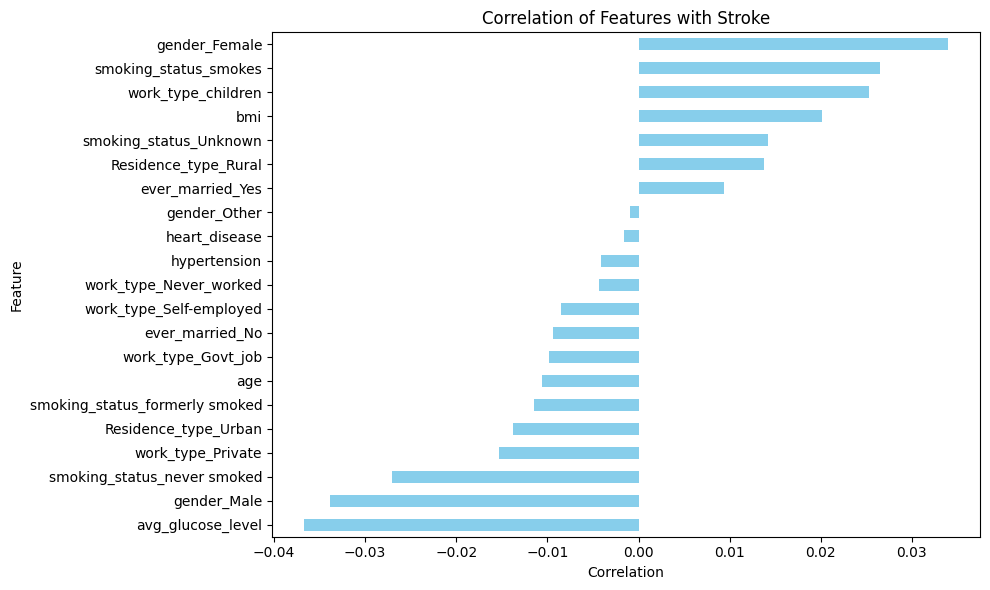

In [5]:
data = pd.read_csv('./src/data.csv')
data = data.drop(columns=['id'])
data_jovem = data.query('age <= 35')


data_jovem = pd.get_dummies(data_jovem, columns=[
                      'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])


print(data_jovem.info())


numerical_vars = ['age', 'avg_glucose_level', 'bmi']
skewness = data_jovem[numerical_vars].apply(skew)
kurtosis_value = data_jovem[numerical_vars].apply(kurtosis)

print("\nSkewness:")
print(skewness)
print("\nKurtosis:")
print(kurtosis_value)


correlation_matrix = data_jovem.corr()

stroke_correlation = data_jovem.corr()['stroke'].drop(
    'stroke')


plt.figure(figsize=(10, 6))
stroke_correlation.sort_values().plot(kind='barh', color='skyblue')
plt.title('Correlation of Features with Stroke')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.tight_layout()
plt.show() 